### Novas perguntas do CEO para você:

### 0. Imports

In [24]:
import pandas as pd
import numpy as np

In [25]:
# Loading data
data = pd.read_csv( 'datasets/kc_house_data.csv' )

In [26]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1. Qual a média do preço de compra dos imóveis por “Nível”?
    - Nível 0 -> Preço entre R$ 0 e R$ 321.950
    - Nível 1 -> Preço entre R$ 321.950 e R$ 450.000
    - Nível 2 -> Preço entre R$ 450.000 e R$ 645.000
    - Nível 3 -> Acima de R$ 645.000

In [27]:
#data['level'] = data['price'].apply( lambda x: TRUE CONDICAO FALSE CONDICAO FALSE CONDICAO )
data['level'] = data['price'].apply( lambda x: 'lv00' if ( x >= 0 ) & ( x <= 321950 ) else
                                               'lv01' if ( x >= 321950 ) & ( x <= 450000 ) else
                                               'lv02' if ( x >= 450000 ) & ( x <= 645000 ) else 'lv03' )

In [28]:
# for i in range( len( data ) ):
#     if data.loc[i, 'price'] < 321950:
#         data.loc[i, 'level'] = 'lv01'
        
#     elif data.loc[i, price]    

#### 2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
    - Size 0 -> Tamanho entre 0 e 1427 sqft
    - Size 1 -> Tamanho entre 1427 e 1910 sqft
    - Size 2 -> Tamanho entre 1910 e 2550 sqft
    - Size 3 -> Tamanho acima de 2550 sqft

In [29]:
data['size'] = data['sqft_living'].apply( lambda x: 's00' if ( x >= 0 ) & ( x <= 1427 ) else
                                                    's01' if ( x >= 1427 ) & ( x <= 1910 ) else
                                                    's02' if ( x >= 1910 ) & ( x <= 2550 ) else 's03' )

### 3. Adicione as seguintes informações ao conjunto de dados original:
    - Place ID: Identificação da localização
    - OSM Type: Open Street Map type
    - Country: Nome do País
    - Country Code: Código do País

In [7]:
#Passos para realização 
# importar Nominatim
# criar variáveis na ordem geolocator, response e query (gerar o head do lat/long para preencher a query)
# criar a variável query e inserir o primeiro lat/long (rodar a variável query)
# rodar a variável dentro de geolocator e response
# rodar response.raw para gerar os dados de localização

In [11]:
# Rodar 1, 4 
from geopy.geocoders import Nominatim

geolocator = Nominatim( user_agent = 'geopyExercises' )

query = '47.5112, -122.257'
response = geolocator.reverse( query )

In [9]:
# Rodar 6
# para rodar o processo em paralelo
# import time
# from multiprocessing import Pool

In [25]:
# Rodar 7
# Quando eu tenho duas colunas dentro do lambda preciso passar o axis=1 para funcionar
data['query'] = data[['lat', 'long']].apply( lambda x: str( x['lat']) + ',' + str( x['long'] ), axis=1 )

In [26]:
# Rodar 10
def get_data( x ):
    index, row = x
    time.sleep( 1 )
    
    #Chamada API
    responde = geolocator.reverser( row['query'])
    
    place_id = response.raw['place_id']
    osm_type = response.raw['osm_type']
    country = response.raw['adress']['country']
    country_code = response.raw['adress']['country_code']
    
    return place_id, osm_type, country, country_code

In [27]:
# Rodar 8 
# Não funciona multithread dentro do Jupyter Notebook, precisa rodar no Vim que pode processar várias queries em paralelo.
# Importante tirar essa função do Jupyter Notebook e importá-la como módulo.

import defs

df1 = data[['id', 'query']].sample(10)

p = Pool( 3 )

start = time.process_time()
df1[['place_id', 'osm_type', 'country', 'country_code']] = p.map( defs.get_data, df1.iterrows() )
end = time.process_time()

print( 'time Elapsed: {}', end - start )

NameError: name 'defs' is not defined

In [ ]:
# Rodar 11
df1.head()

In [ ]:
# Rodar 9
df1.iterrows()

In [12]:
# Rodar 5 
# para pegar o json no dicionário
response.raw

{'place_id': 159597608,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [9]:
# Rodar 2
data[['lat', 'long']].head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


In [10]:
# Rodar 3
query = '47.5112, -122.257'

### 4. Adicione os seguintes filtros no Mapa:
    - Tamanho mínimo da área da sala de estar.
    - Número mínimo de banheiros.
    - Valor Máximo do Preço.
    - Tamanho máximo da área do porão.
    - Filtro das Condições do Imóvel.
    - Filtro por Ano de Construção.


In [30]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from plotly import express as px

In [31]:
# df = pd.read_csv( 'datasets/kc_house_data.csv')

# df['is_waterfront'] = df['waterfront'].apply( lambda x: 'yes' if x == 1 else 'no')

# df['level'] = df['price'].apply( lambda x: 0 if x < 321950 else
#                                            1 if ( x > 321950) & ( x < 450000) else
#                                            2 if ( x > 450000) & ( x < 645000) else 3 )
# df['level'] = df['level'].astype( int )
# style = { 'description_width': 'initial'}

In [32]:
#Iterative buttons
price_limit = widgets.IntSlider( 
    value = int( data[ 'price'].mean() ),
    min = float(data[ 'price'].min() ),
    max = float(data[ 'price'].max() ),
    step = 1,
    description = 'Maximum Price',
    disable = False,
    style = {'description_width': 'initial'})

#define interactive buttons
living_limit = widgets.IntSlider( 
    value = int( data['sqft_living'].mean() ),
    min =  data['sqft_living'].min(),
    max =  data['sqft_living'].max(),
    step = 1,
    description = 'Minium Living Room Size',
    disable = False,
    style = {'description_width': 'initial'})

#define interactive buttons
bathroom_limit = widgets.IntSlider( 
    value = data['bathrooms'].mean(),
    min =  data['bathrooms'].min(),
    max =  data['bathrooms'].max(),
    step = 1,
    description = 'Minium Bathorooms values',
    disable = False,
    style = {'description_width': 'initial'})

#define interactive buttons
basement_limit = widgets.IntSlider( 
    value = data['sqft_basement'].mean(),
    min =  data['sqft_basement'].min(),
    max =  data['sqft_basement'].max(),
    step = 1,
    description = 'Maximum Basement',
    disable = False,
    style = {'description_width': 'initial'})

#define interactive buttons
condition_limit = widgets.IntSlider( 
    value = data['condition'].mean(),
    min =  data['condition'].min(),
    max =  data['condition'].max(),
    step = 1,
    description = 'House Condition',
    disable = False,
    style = {'description_width': 'initial'})

#define interactive buttons
yr_built_condition = widgets.IntSlider( 
    value = data['yr_built'].mean(),
    min =  data['yr_built'].min(),
    max =  data['yr_built'].max(),
    step = 1,
    description = 'Year Built Limit',
    disable = False,
    style = {'description_width': 'initial'})

In [33]:
def update_map( df, price_limit, living_limit, bathroom_limit, basement_limit, condition_limit, yr_built_condition ):
    #filter data
    houses = df[(df['price'] <= price_limit) & 
                (df['sqft_living'] > living_limit ) & 
                (df['bathrooms'] > bathroom_limit ) & 
                (df['sqft_basement'] < basement_limit )& 
                (df['condition'] == condition_limit ) & 
                (df['yr_built'] > yr_built_condition )][['id', 'lat', 'long', 'price', 'sqft_living']]. copy()
    #plot map     
    fig = px.scatter_mapbox( houses, 
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         color_continuous_scale=px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom = 10 )
    
    fig.update_layout( mapbox_style='open-street-map')
    fig.update_layout( height = 600, margin={ 'r':0, 'l':0, 't':0, 'b':0})
    fig.show()

In [34]:
widgets.interactive( update_map, df=fixed( data), price_limit=price_limit,
                   living_limit = living_limit,
                   bathroom_limit = bathroom_limit,
                   basement_limit = basement_limit,
                   condition_limit = condition_limit,
                   yr_built_condition = yr_built_condition)

interactive(children=(IntSlider(value=540088, description='Maximum Price', max=7700000, min=75000, style=Slide…

### 5. Adicione os seguintes filtros no Dashboard:
    - Filtro por data disponível para compra.
    - Filtro por ano de renovação.
    - Filtro se possui vista para a água ou não.



In [35]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,size
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,lv00,s00
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,lv02,s03
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,lv00,s00
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,lv02,s02
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,lv02,s01


In [55]:
import ipywidgets as widgets
from matplotlib import gridspec
from matplotlib import pyplot as plt
import seaborn as sns

In [56]:
# prepare dataset]
#data = pd.read_csv( 'datasets/kc_house_data.csv' )

# format 
data['year'] = pd.to_datetime( data['date'] ).dt.strftime('%Y' )
data['date'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%m-%d'  )
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime( '%Y-%U')

# filtering 
date_limit = widgets.SelectionSlider(
    options = data['date'].sort_values().unique().tolist(),
    value = '2014-12-01',
    description = 'Max available date',
    disable = False,
    continous_update = False,
    style = {'description_width': 'initial'},
    redout = True )

year_limit = widgets.SelectionSlider(
    options = data['yr_renovated'].sort_values().unique().tolist(),
    value = 2000,
    description = 'Max Year',
    disable = False,
    continous_update = False,
    style = {'description_width': 'initial'},
    redout = True )

waterfront_limit = widgets.Checkbox(
    value = False,
    description = 'Is Waterfront?',
    disable = False,
    indent = False )

In [83]:
def update_map( data, date_limit, year_limit, waterfront_limit ):
    #filtering data
    df = data[(data['date'] <= date_limit )&
              (data['yr_renovated'] >= year_limit ) &
              (data['waterfront'] == waterfront_limit)].copy()
    
    fig = plt.figure( figsize=(24,12))
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )
    
    ax1 = fig.add_subplot( specs[0, :] )
    ax2 = fig.add_subplot( specs[1, 0] )
    ax3 = fig.add_subplot( specs[1, 1] )
    
    # first graph
    by_year = df[['price', 'year']].groupby( 'year' ).sum().reset_index()
    sns.barplot( x='year', y='price', data=by_year, ax=ax1 )   
    
     # second graph
    by_day = df[['price', 'date']].groupby( 'date' ).mean().reset_index()
    sns.lineplot( x='date', y='price', data=by_day, ax=ax2 )
    plt.xticks( rotation=90 );
   
    
     # third graph
    by_week_of_year = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()
    sns.barplot( x='year_week', y='price', data= by_week_of_year, ax=ax3 )   
    plt.xticks( rotation=90 );
    

interactive(children=(SelectionSlider(description='Max available date', index=371, options=('2014-05-02', '201…

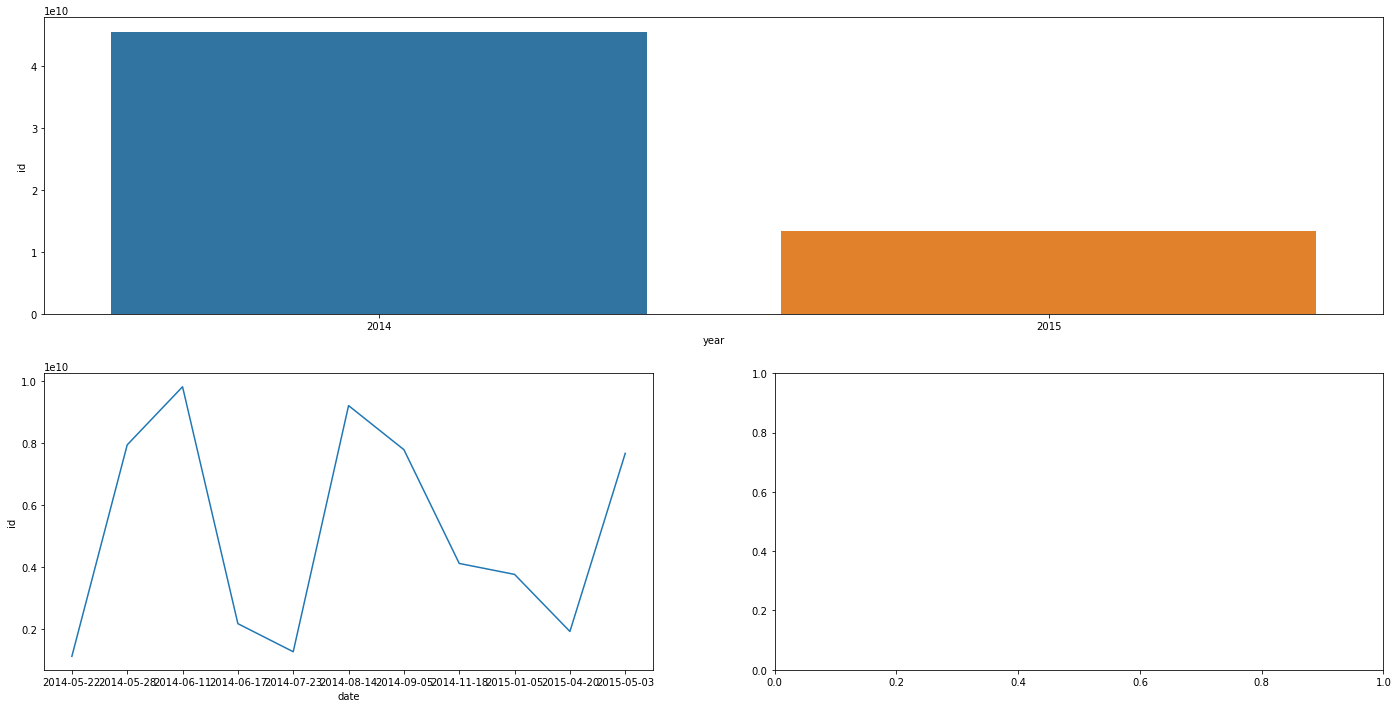

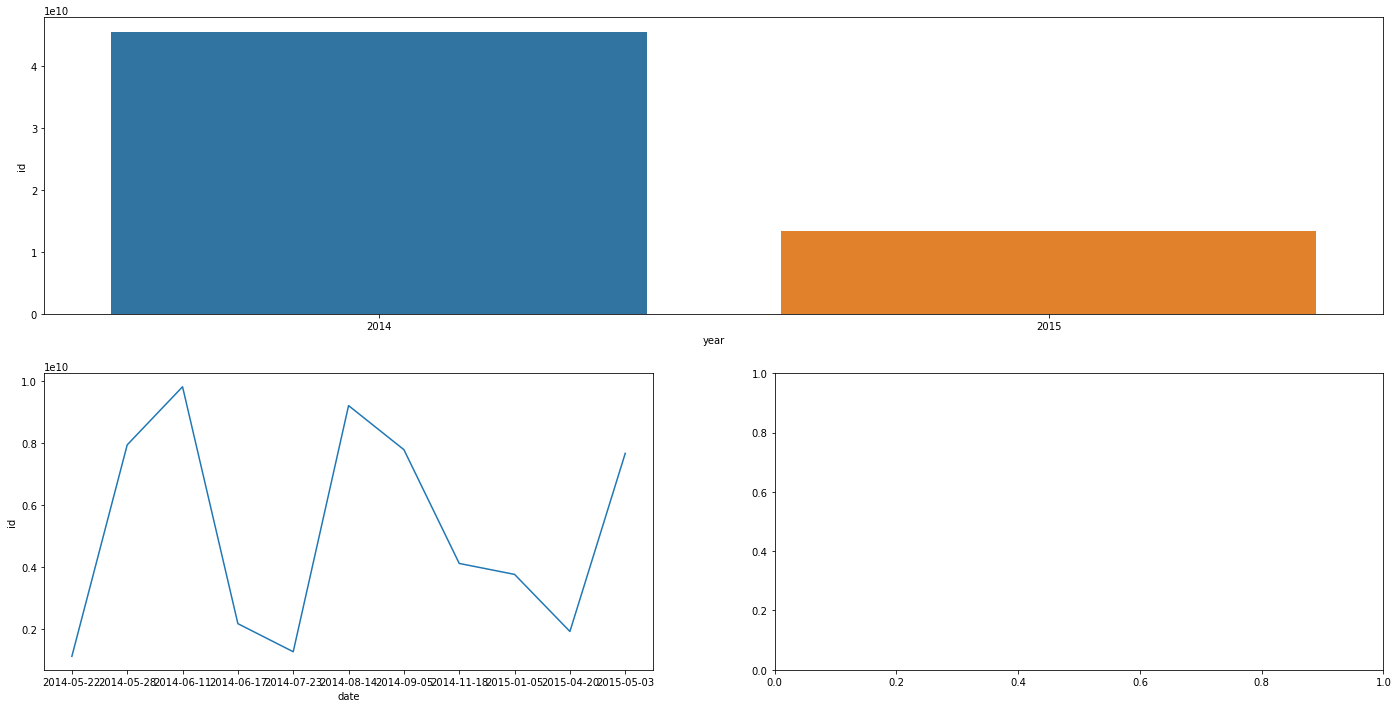

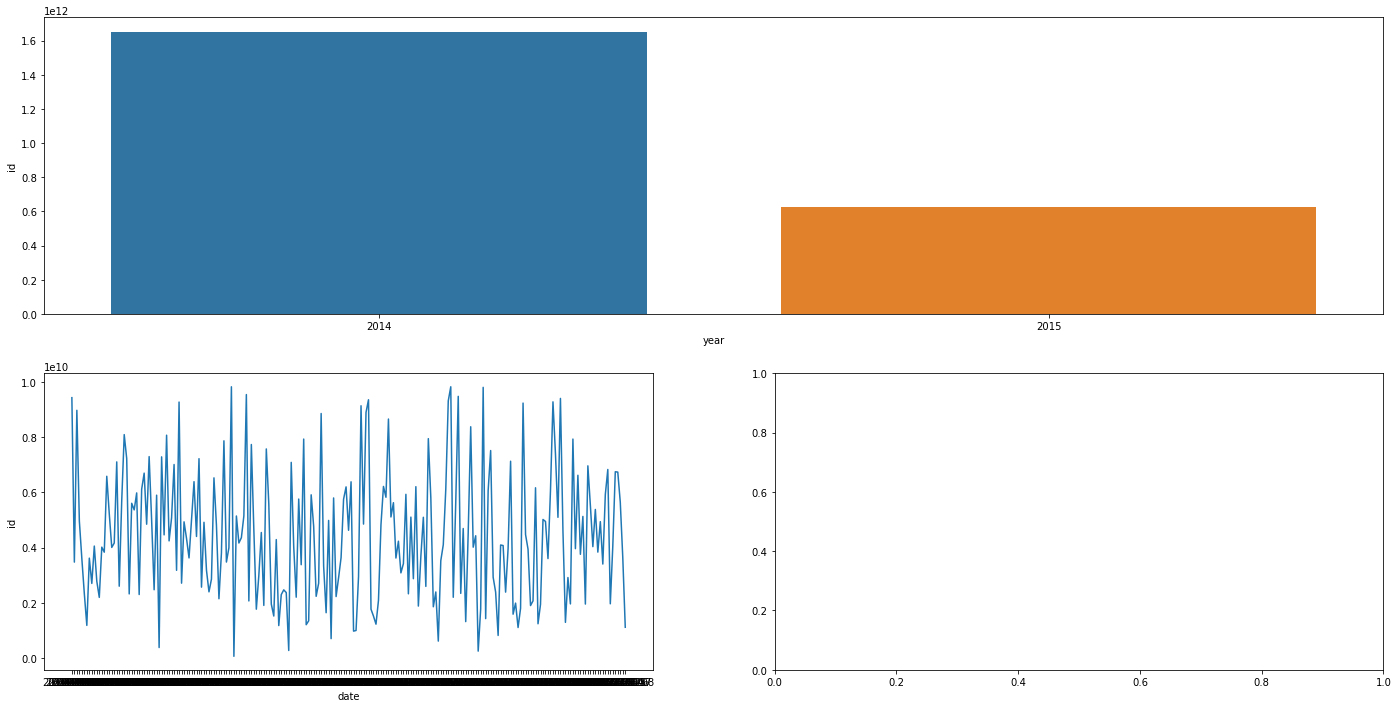

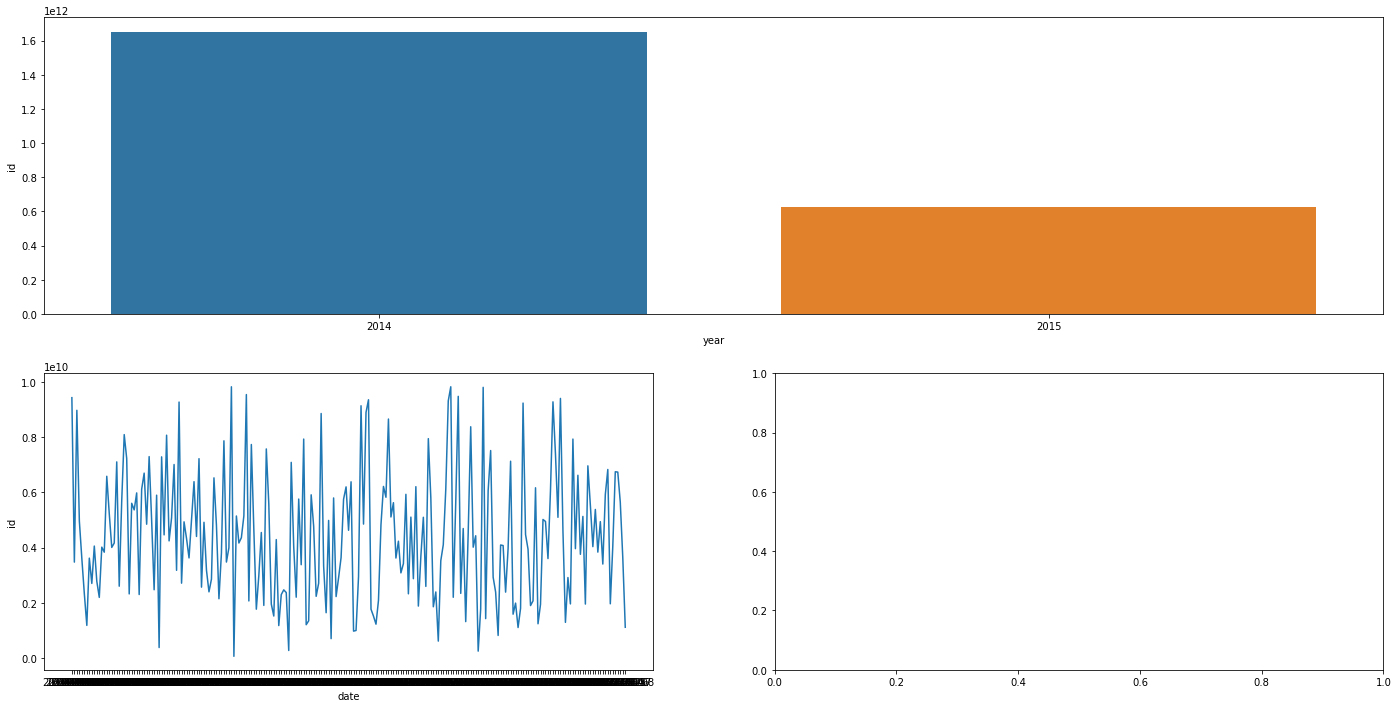

In [84]:
widgets.interactive( update_map,
                     data = fixed( data ),
                     date_limit=date_limit,
                     year_limit=year_limit,
                     waterfront_limit=waterfront_limit )